<a href="https://colab.research.google.com/github/njpinton/CMSC173/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎶 Taylor Swift Spotify Dataset: Exploratory Data Analysis (EDA)

This notebook explores the **Taylor Swift Spotify Dataset** from Kaggle.  
We will perform **data cleaning, summary statistics, visualization, and correlation analysis** to understand patterns in her music across albums.

---

## 📌 Objectives
1. Load and clean the dataset.
2. Explore descriptive statistics (distribution of popularity, track counts, etc.).
3. Visualize trends across albums.
4. Compute and analyze correlations between audio features.


In [28]:
# ===============================
# 1. Setup
# ===============================

# !pip install kagglehub --quiet

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

## 📂 2. Load Dataset

We will use **KaggleHub** to fetch the dataset directly from Kaggle.  
This avoids the need for API keys and makes the notebook fully reproducible.  


In [18]:
# --- 2. Load Dataset ---
path = kagglehub.dataset_download("jarredpriester/taylor-swift-spotify-dataset/versions/1")

print("Path to dataset files:", path)

# Check what files are inside
print(os.listdir(path))

# Load the main CSV (replace with actual file name if different)
df = pd.read_csv(os.path.join(path, "taylor_swift_spotify.csv"), index_col=0)

df.head()

Using Colab cache for faster access to the 'taylor-swift-spotify-dataset' dataset.
Path to dataset files: /kaggle/input/taylor-swift-spotify-dataset
['.cache', 'taylor_swift_spotify.csv']


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,87,202395
1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,87,218270
2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,88,200690
3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,86,256124
4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,87,194206


## 🔍 3. Basic Information

Before diving deeper, let’s inspect:
- Data types (`info()`)
- Missing values
- Descriptive statistics


In [24]:
# --- 3. Basic Information ---
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 1265 entries, 0 to 1264
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1265 non-null   object 
 1   album             1265 non-null   object 
 2   release_date      1265 non-null   object 
 3   track_number      1265 non-null   int64  
 4   id                1265 non-null   object 
 5   uri               1265 non-null   object 
 6   acousticness      1265 non-null   float64
 7   danceability      1265 non-null   float64
 8   energy            1265 non-null   float64
 9   instrumentalness  1265 non-null   float64
 10  liveness          1265 non-null   float64
 11  loudness          1265 non-null   float64
 12  speechiness       1265 non-null   float64
 13  tempo             1265 non-null   float64
 14  valence           1265 non-null   float64
 15  popularity        1265 non-null   int64  
 16  duration_ms       1265 non-n


--- Missing Values ---
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [22]:
print("\n--- Descriptive Statistics ---")
df.describe(include="all")


--- Descriptive Statistics ---


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1265,1265,1265,1265.000000,1265,1265,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
unique,484,47,25,NaN,1265,1265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Story Of Us,folklore: the long pond studio sessions (from ...,2008-11-11,NaN,12QHKhw9K9yJOJ1nKRiBYI,spotify:track:12QHKhw9K9yJOJ1nKRiBYI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,68,156,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.536759,NaN,NaN,0.321938,0.593117,0.563992,0.090735,0.162244,-7.911692,0.113597,120.876979,0.414598,39.592095,230381.618182
std,NaN,NaN,NaN,7.245936,NaN,NaN,0.342390,0.111157,0.201305,0.235631,0.121155,3.184218,0.232660,30.248042,0.203684,23.433611,59389.217176
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000025,0.175000,0.063900,0.000000,0.029100,-17.932000,0.023100,47.607000,0.037400,0.000000,41769.000000
25%,NaN,NaN,NaN,5.000000,NaN,NaN,0.020200,0.529000,0.398000,0.000000,0.099600,-10.147000,0.030200,95.997000,0.236000,22.000000,208986.000000
50%,NaN,NaN,NaN,10.000000,NaN,NaN,0.151000,0.599000,0.579000,0.000005,0.119000,-7.369000,0.036300,118.984000,0.412000,40.000000,233626.000000
75%,NaN,NaN,NaN,14.000000,NaN,NaN,0.686000,0.662000,0.729000,0.000898,0.178000,-5.572000,0.055300,141.950000,0.551000,59.000000,256053.000000


## 📊 4. Exploratory Visualizations

We will explore:
1. **Track counts per album**  
2. **Distribution of popularity**  
3. **Average popularity per album**


/tmp/ipython-input-2366658492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_counts.index, y=album_counts.values, palette="Set2")


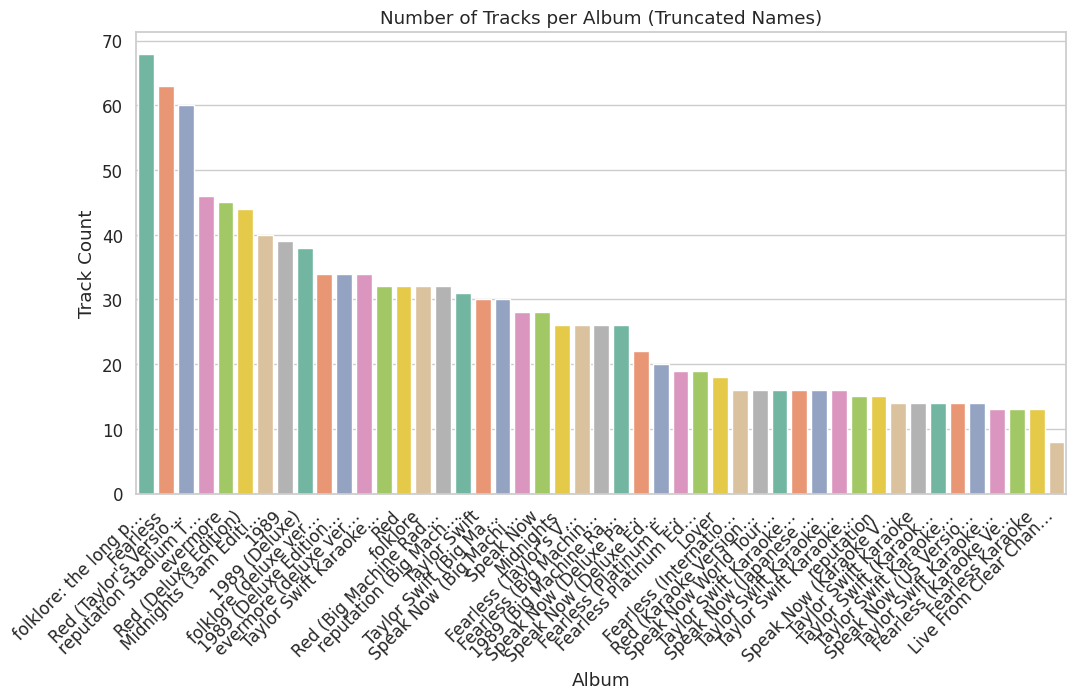

In [42]:
# Track counts per album with truncated labels
col_name_album = "album"
if col_name_album in df.columns:
    album_counts = df[col_name_album].value_counts()

    plt.figure(figsize=(12,6))
    sns.barplot(x=album_counts.index, y=album_counts.values, palette="Set2")

    # Truncate album names to first 20 characters
    truncated_labels = [label[:20] + "…" if len(label) > 20 else label
                        for label in album_counts.index]

    plt.xticks(ticks=range(len(album_counts.index)), labels=truncated_labels, rotation=45, ha="right")
    plt.title("Number of Tracks per Album (Truncated Names)")
    plt.ylabel("Track Count")
    plt.xlabel("Album")
    plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


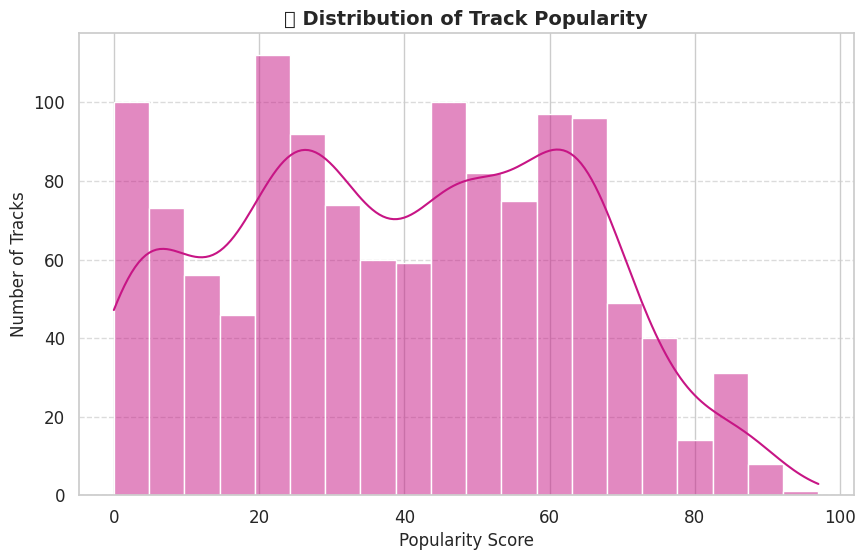

In [43]:
# 🎶 Popularity Distribution
col_name_popularity = "popularity"
if col_name_popularity in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col_name_popularity], bins=20, kde=True, color="mediumvioletred")  # lively color

    plt.title("🎤 Distribution of Track Popularity", fontsize=14, weight="bold")
    plt.xlabel("Popularity Score", fontsize=12)
    plt.ylabel("Number of Tracks", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


/tmp/ipython-input-2383810919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


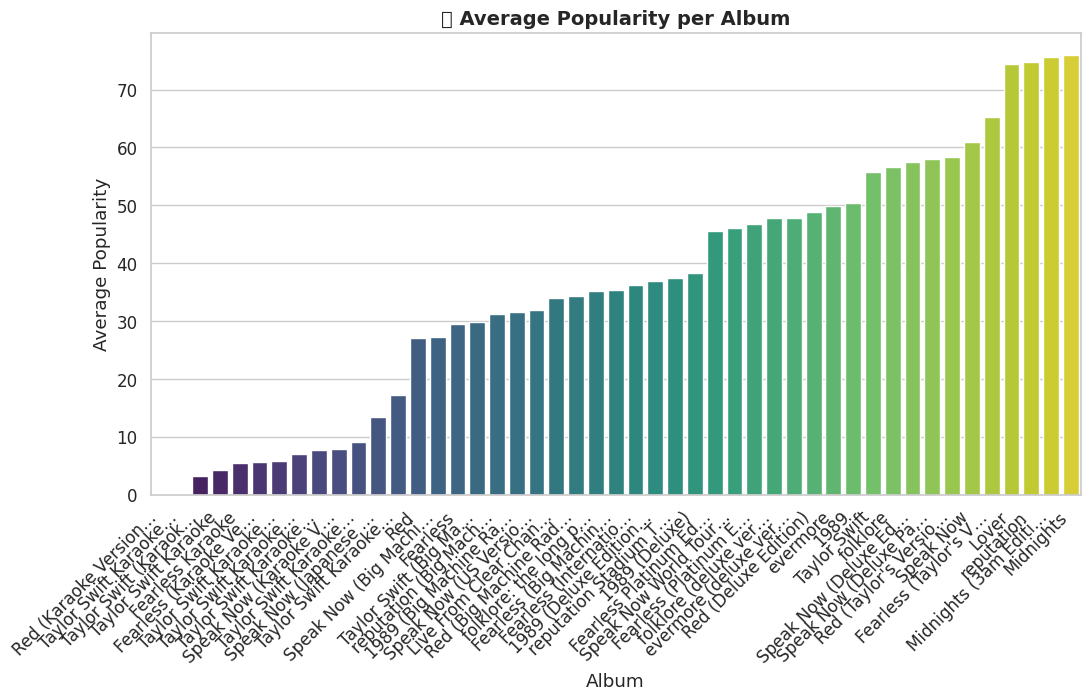

In [52]:
# 🎶 Average popularity per album (with truncated album names)
if {col_name_album, col_name_popularity} <= set(df.columns):
    avg_popularity = df.groupby(col_name_album)[col_name_popularity].mean().sort_values()

    plt.figure(figsize=(12,6))
    sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette="viridis")

    # Truncate album names to first 20 characters
    truncated_labels = [label[:20] + "…" if len(label) > 20 else label
                        for label in avg_popularity.index]

    plt.xticks(ticks=range(len(avg_popularity.index)), labels=truncated_labels, rotation=45, ha="right")
    plt.title("🎤 Average Popularity per Album", fontsize=14, weight="bold")
    plt.ylabel("Average Popularity")
    plt.xlabel("Album")
    plt.show()


## 🔗 5. Correlation Analysis

Now, let’s analyze correlations between numerical audio features.  
This helps us identify relationships, such as:
- Is **energy** correlated with **loudness**?  
- Does **danceability** relate to **valence** (positivity of a song)?  

We’ll compute the correlation matrix using `.corr()` and visualize it with a heatmap.



--- Correlation Matrix ---


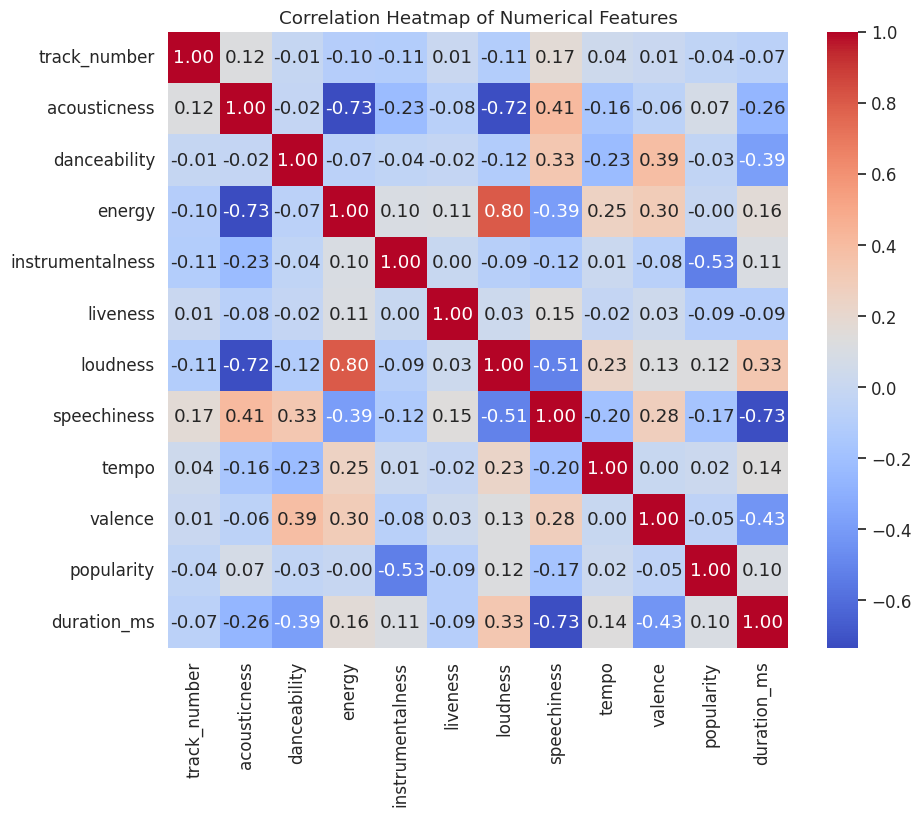

In [54]:
# Compute correlation
corr_matrix = df.corr(numeric_only=True)

print("\n--- Correlation Matrix ---")
# print(corr_matrix)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 🎶 Normalizing Audio Features for Comparison

Before comparing the distributions of audio features across albums,  
it is important to bring them onto the **same scale**.  
Features like *danceability*, *energy*, and *acousticness* are already bounded in [0,1],  
but others (e.g., loudness, tempo, duration) have very different ranges.  

To make comparisons fair, we apply **Min–Max normalization**:

$$
X' = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

This scales every feature into the range [0,1],  
so that boxplots across albums can be meaningfully compared.


,Album,Features,Values,Album_short
0,Midnights (3am Edition),acousticness,0.207508,Midnights (3am Editi…
1,Midnights (3am Edition),acousticness,0.060302,Midnights (3am Editi…
2,Midnights (3am Edition),acousticness,0.135278,Midnights (3am Editi…
3,Midnights (3am Edition),acousticness,0.747705,Midnights (3am Editi…
4,Midnights (3am Edition),acousticness,0.423180,Midnights (3am Editi…


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


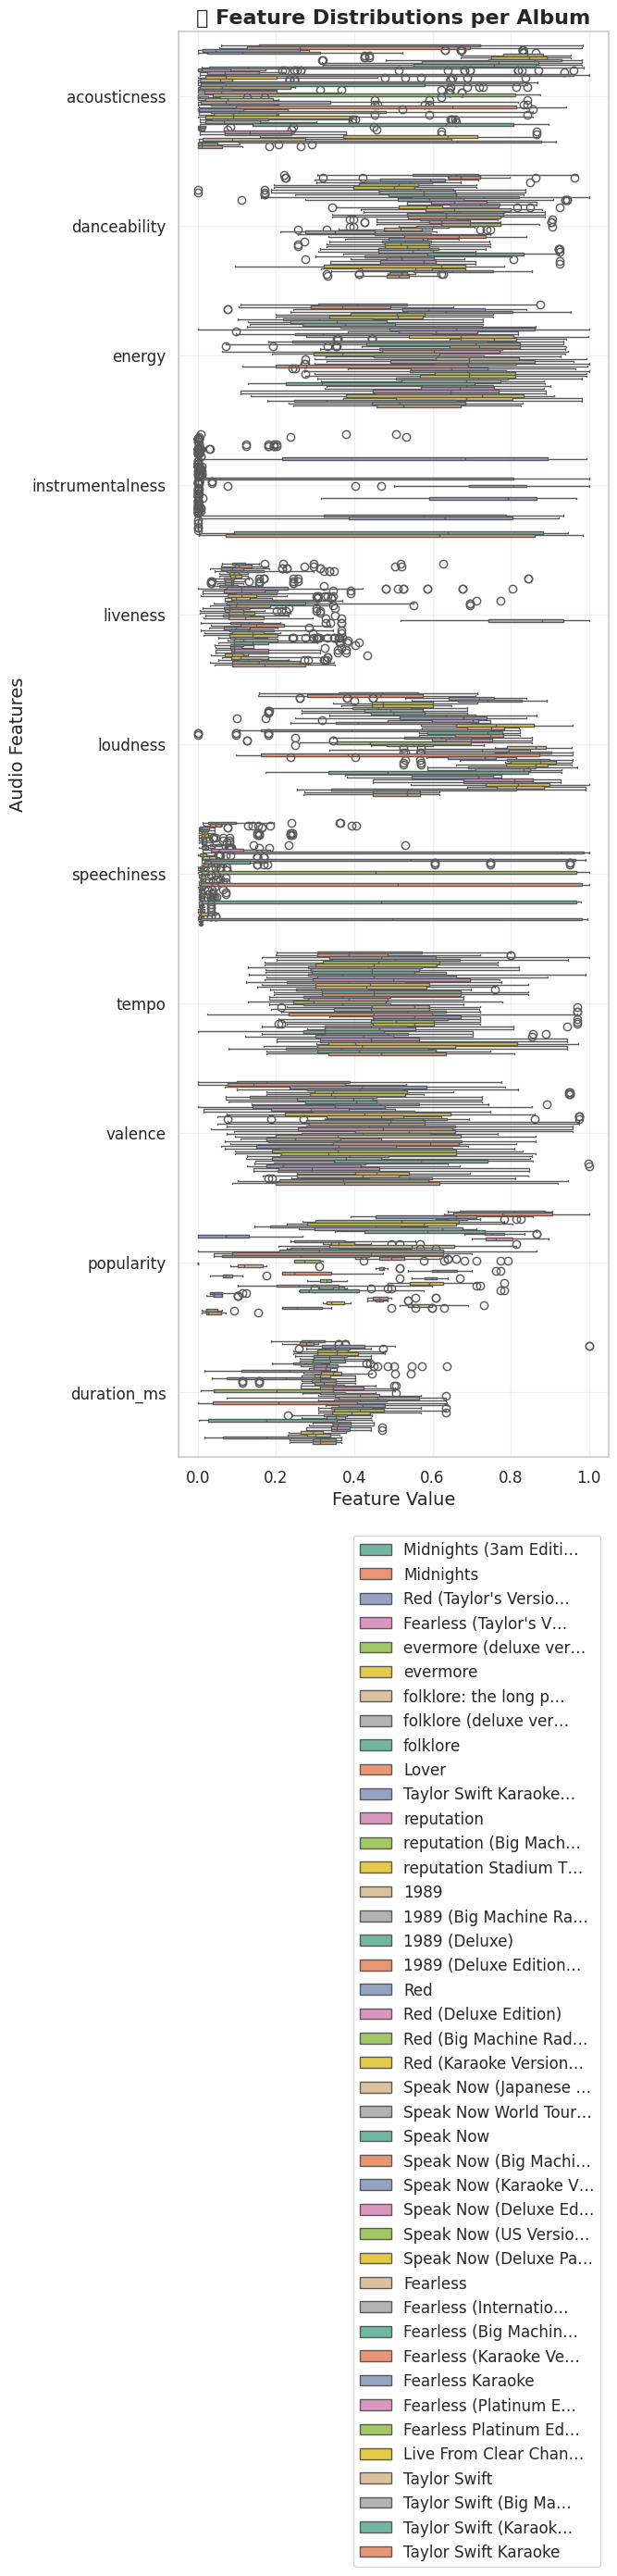

In [87]:
import textwrap
from sklearn.preprocessing import MinMaxScaler

feature_cols = df.columns.values[np.r_[6:17]]

# ✅ Normalize features to [0,1]
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])


# 🎶 Collect all features in [0, 1] range
melted_df = pd.melt(
    df_scaled,
    id_vars="album",
    value_vars=df.columns.values[np.r_[6:17]]
)
melted_df.columns = ['Album', 'Features', 'Values']

# ✅ Shorten album names (truncate to 20 chars)
melted_df["Album_short"] = melted_df["Album"].apply(
    lambda x: x[:20] + "…" if len(x) > 20 else x
)

display(melted_df.head())

# 🎨 Plot boxplots per album (with truncated names)
plt.figure(figsize=(6,20))
sns.boxplot(
    data=melted_df,
    width=0.8,
    orient="h",
    x="Values",
    y="Features",
    hue="Album_short",
    palette="Set2"   # lively colors
)

plt.title("🎧 Feature Distributions per Album", fontsize=16, weight="bold")
plt.xlabel("Feature Value", fontsize=14)
plt.ylabel("Audio Features", fontsize=14)

plt.rc('axes', labelsize=13)
plt.legend(bbox_to_anchor=(1, -0.05))
plt.grid(alpha=0.3)
plt.show()


# 📅 Release Date Distribution

Here we explore when Taylor Swift’s tracks were released:  
- **Day of the month** → do releases cluster around certain days?  
- **Month of the year** → are there seasonal patterns?  
- **Year of release** → how has output evolved over time?  


/tmp/ipython-input-2355703410.py:31: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2355703410.py:31: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2355703410.py:31: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


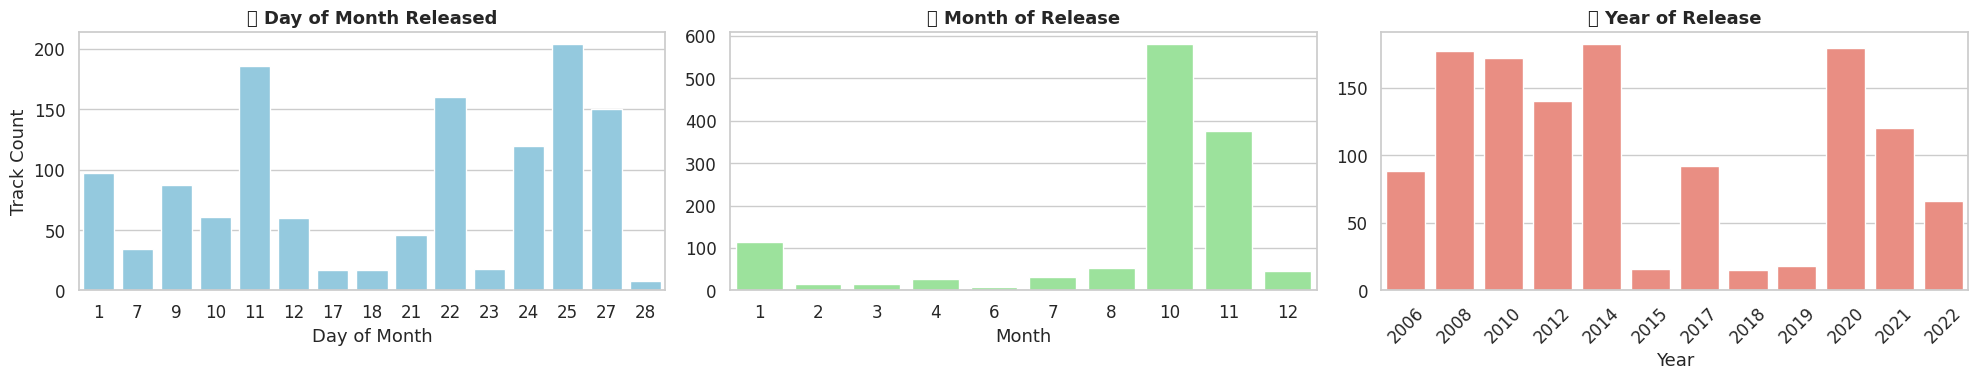

In [88]:
# Ensure release_date is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract components
df['release_day'] = df['release_date'].dt.day
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# 🎨 Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4), sharey=False)

# Day of month
sns.countplot(x='release_day', data=df, ax=axes[0], color="skyblue")
axes[0].set_title("📆 Day of Month Released", fontsize=13, weight="bold")
axes[0].set_xlabel("Day of Month")
axes[0].set_ylabel("Track Count")

# Month of year
sns.countplot(x='release_month', data=df, ax=axes[1], color="lightgreen")
axes[1].set_title("🌸 Month of Release", fontsize=13, weight="bold")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("")

# Year of release
sns.countplot(x='release_year', data=df, ax=axes[2], color="salmon")
axes[2].set_title("📅 Year of Release", fontsize=13, weight="bold")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


# 📈 Evolution of Audio Features Over Time

To understand how Taylor Swift’s music evolved,  
we can plot the **average value of each audio feature per release year**.  
This helps reveal trends (e.g., increasing *energy*, decreasing *acousticness*).  


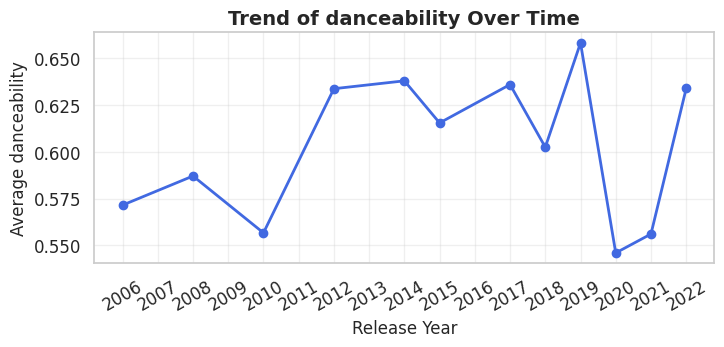

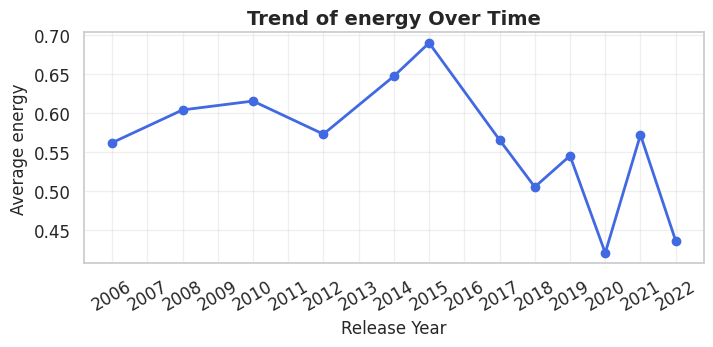

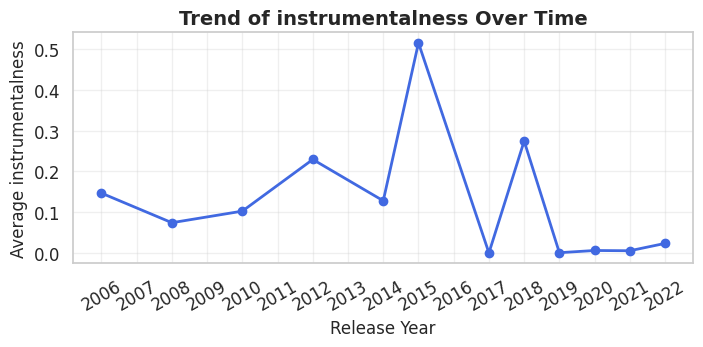

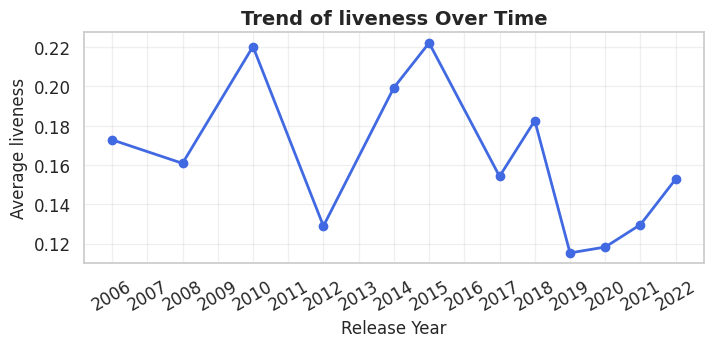

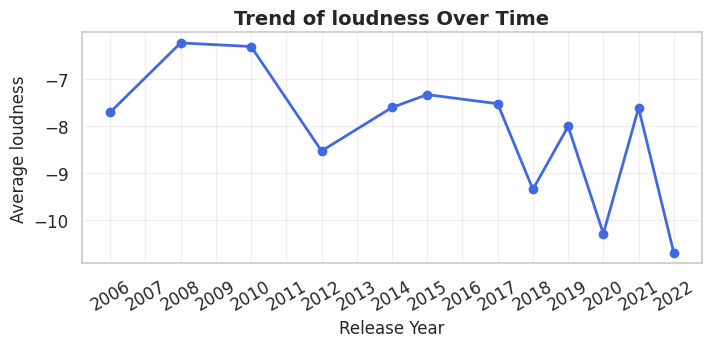

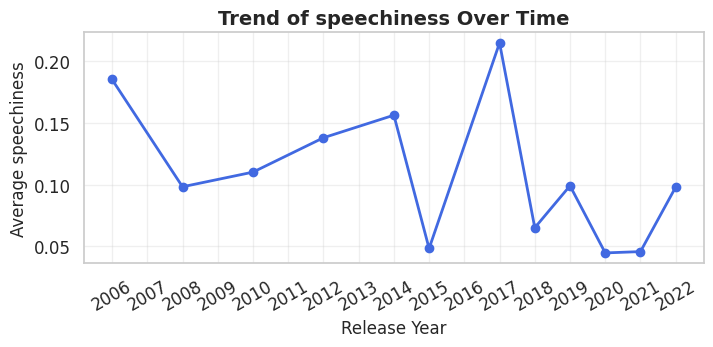

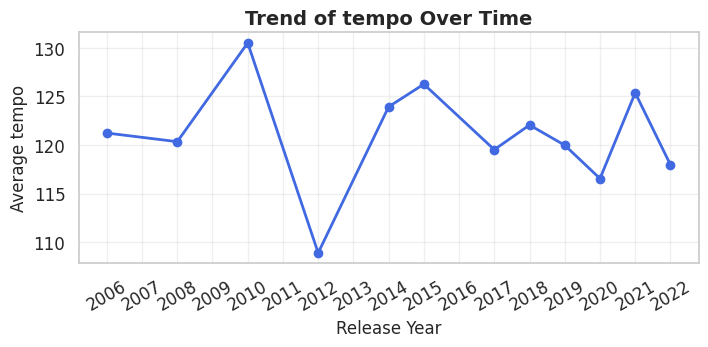

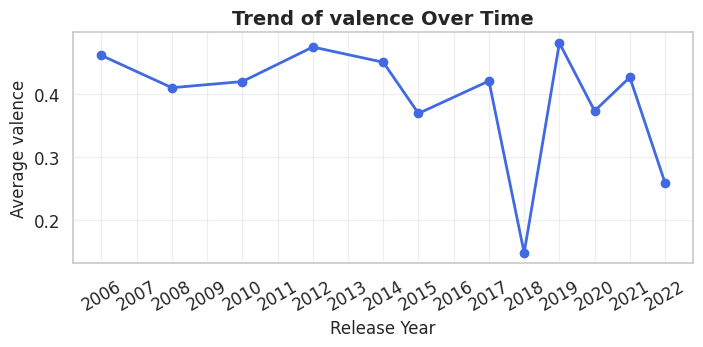

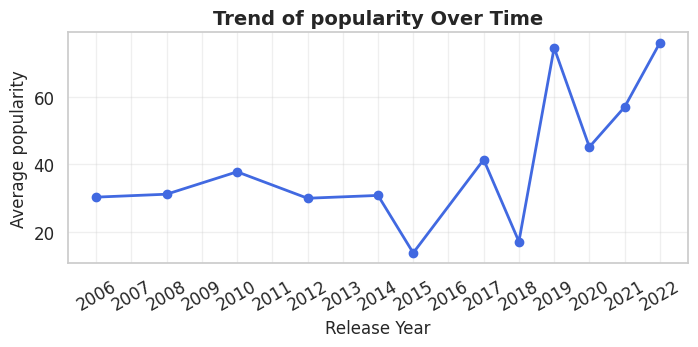

In [90]:
# Ensure release_year exists (from earlier extraction)
if "release_year" not in df.columns:
    df["release_year"] = pd.to_datetime(df["release_date"]).dt.year

# 🎶 Plot average feature values per release year
for prop in df.columns.values[7:16]:
    means = df.groupby("release_year")[prop].mean()

    plt.figure(figsize=(8,3))
    plt.plot(
        means.index,
        means.values,
        marker='o', color="royalblue", linewidth=2
    )

    # Dynamic x-axis ticks
    plt.xticks(
        np.arange(df["release_year"].min(), df["release_year"].max() + 1),
        rotation=30
    )
    plt.ylabel(f"Average {prop}", fontsize=12)
    plt.xlabel("Release Year", fontsize=12)
    plt.title(f"Trend of {prop} Over Time", fontsize=14, weight="bold")
    plt.grid(alpha=0.3)
    plt.show()


# 🎨 Visualizing Taylor Swift's Songs in 2D with Dimensionality Reduction

The audio dataset has many features (danceability, energy, valence, etc.),  
making it difficult to **visualize patterns directly**.  
To explore the structure of the data, we use **dimensionality reduction techniques**,  
projecting high-dimensional feature vectors into **two dimensions**.

We use the following methods:

- **Locally Linear Embedding (LLE)** → preserves local neighborhood structure.  
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)** → emphasizes local clusters.  
- **Isomap** → preserves global geodesic distances.  
- **PCA (Principal Component Analysis)** → linear method capturing maximum variance.  
- **Kernel PCA** → nonlinear extension of PCA with RBF kernels.  

Each point represents a **track**, and points are colored by **popularity**  
(hotter colors = more popular songs).  
This allows us to see whether certain musical styles (captured by features)  
relate to higher or lower popularity.  


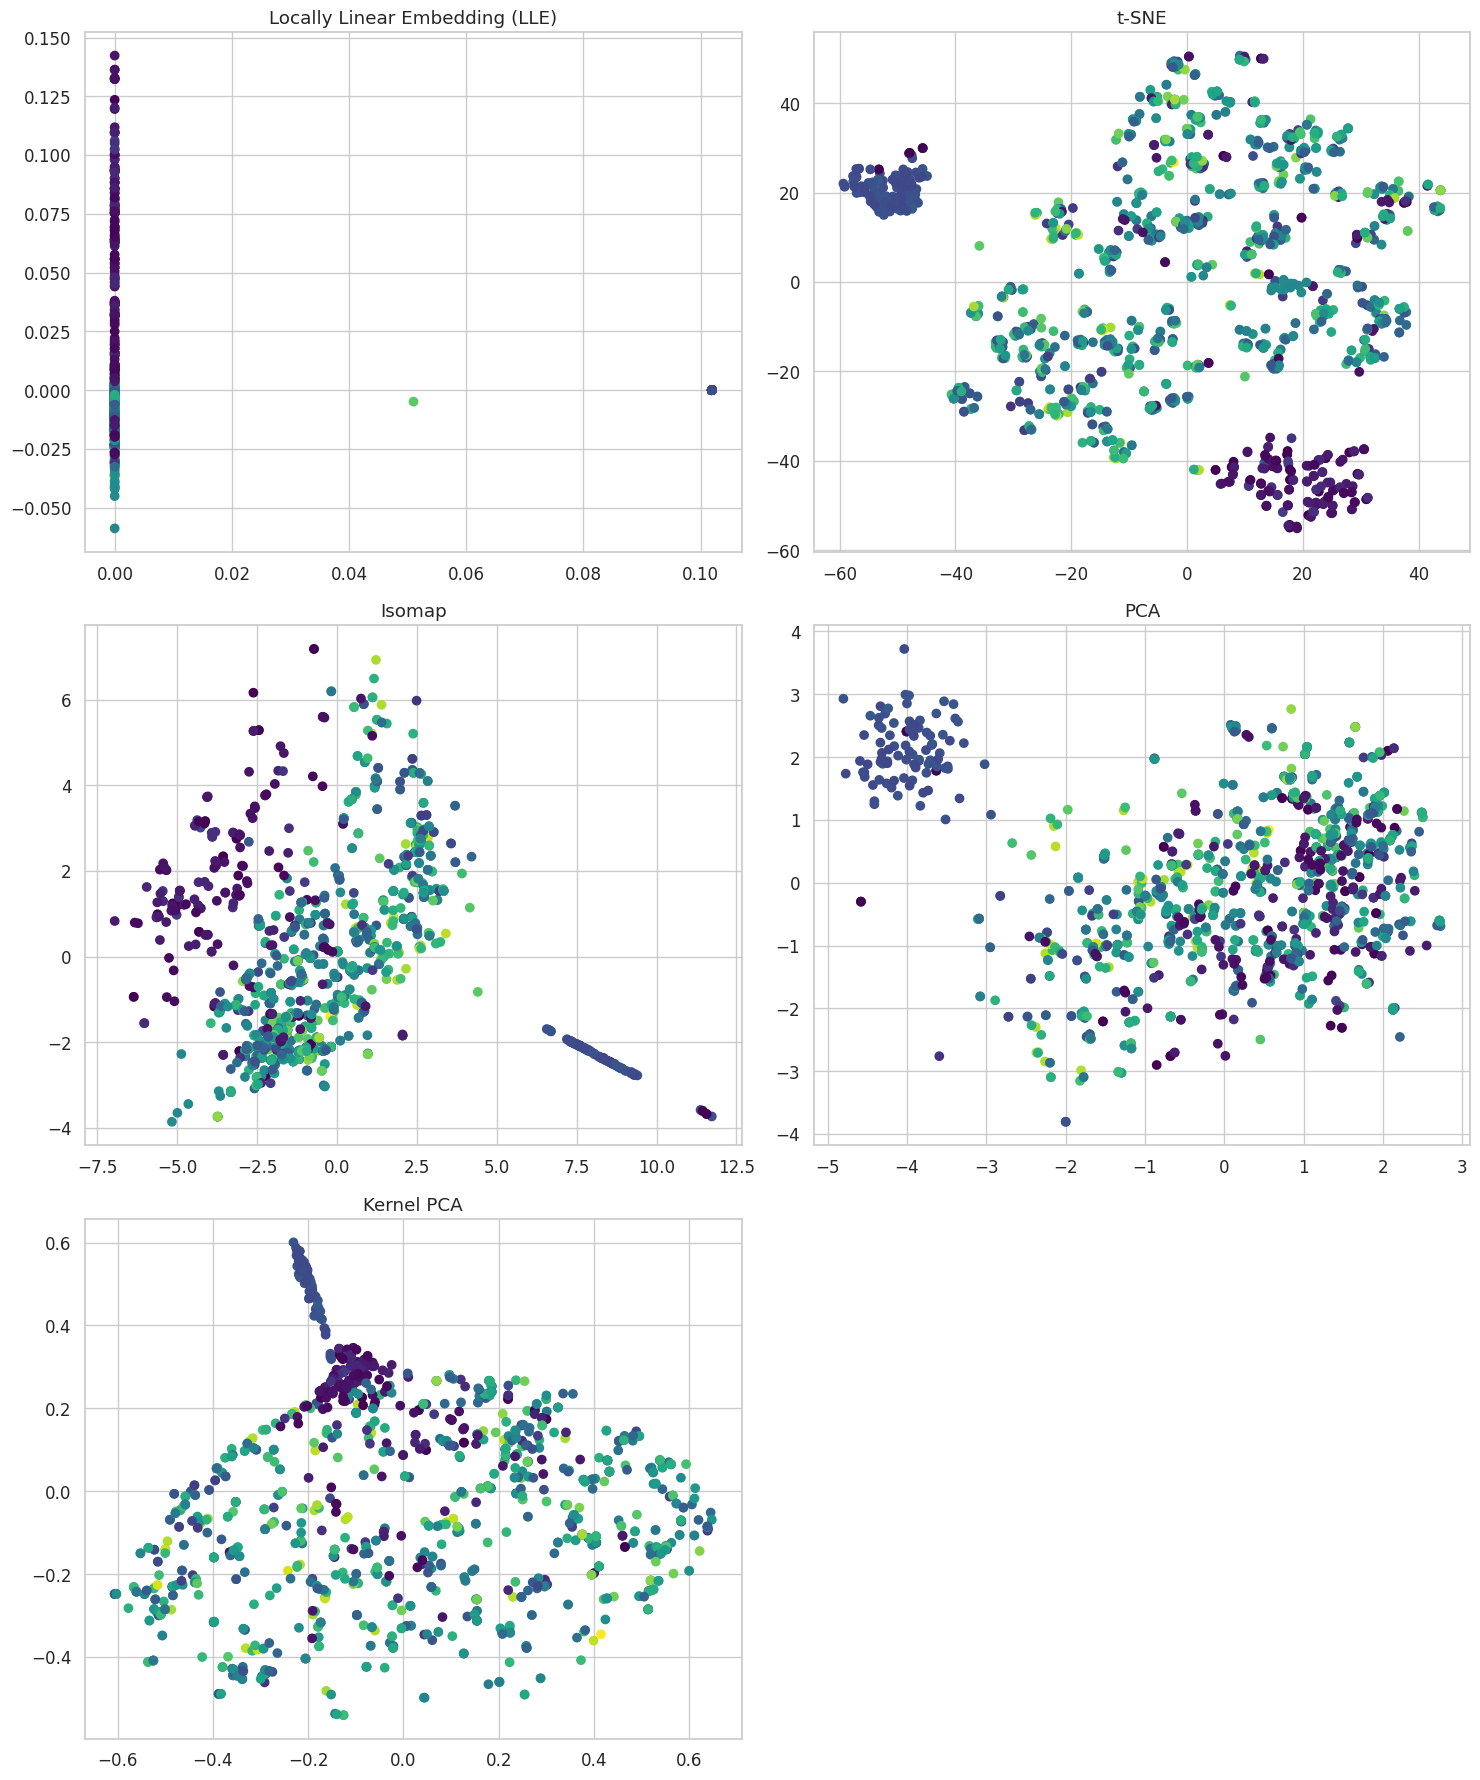

In [93]:
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# 🎶 Select feature columns (similar to earlier analyses)
X = df.iloc[:, np.r_[6:15]]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Params for LLE
params = {
    "n_neighbors": 20,
    "n_components": 2,
    "random_state": 0,
}

# 🎨 Setup subplots
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(
    nrows=3, ncols=2, figsize=(15,18), sharey=False
)

# Color by popularity
colorby = df['popularity']

# ---- Locally Linear Embedding
lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
X_lle = lle_standard.fit_transform(X_scaled)
ax1.scatter(X_lle[:,0], X_lle[:,1], c=colorby, cmap="viridis")
ax1.set_title("Locally Linear Embedding (LLE)")

# ---- t-SNE
tsne = manifold.TSNE(random_state=0, n_components=2)
X_tsne = tsne.fit_transform(X_scaled)
ax2.scatter(X_tsne[:,0], X_tsne[:,1], c=colorby, cmap="viridis")
ax2.set_title("t-SNE")

# ---- Isomap
iso = manifold.Isomap(n_neighbors=20, n_components=2)
X_iso = iso.fit_transform(X_scaled)
ax3.scatter(X_iso[:,0], X_iso[:,1], c=colorby, cmap="viridis")
ax3.set_title("Isomap")

# ---- PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
ax4.scatter(X_pca[:,0], X_pca[:,1], c=colorby, cmap="viridis")
ax4.set_title("PCA")

# ---- Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.2)
X_kpca = kpca.fit_transform(X_scaled)
ax5.scatter(X_kpca[:,0], X_kpca[:,1], c=colorby, cmap="viridis")
ax5.set_title("Kernel PCA")

# Hide unused 6th axis
ax6.axis("off")

plt.tight_layout()
plt.show()
